In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler , PolynomialFeatures , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error , mean_absolute_error , mean_absolute_percentage_error

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
df = pd.read_csv('insurance.csv')

In [6]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520




### **One-Hot Encoding of Categorical Features**

The following code performs one-hot encoding on the categorical features in the DataFrame `df`:

1. **Define Categorical Features**:
   - We have three categorical features: `'sex'`, `'smoker'`, and `'region'`.

2. **Apply One-Hot Encoding**:
   - The `OneHotEncoder` from scikit-learn is used to convert the categorical variables into numerical format. The `drop='first'` parameter is set to avoid the dummy variable trap (i.e., removing the first category of each feature to prevent collinearity). The `sparse_output=False` option ensures that the result is returned as a dense array instead of a sparse matrix.

3. **Transform the Categorical Data**:
   - The `fit_transform` method applies the one-hot encoding to the specified categorical columns (`sex`, `smoker`, `region`).

4. **Create a DataFrame with Encoded Columns**:
   - A new DataFrame `encoded_df` is created with the one-hot encoded values. The columns are named based on the original categorical feature names, prefixed by the feature values (e.g., `sex_male`, `smoker_yes`).

5. **Concatenate the Original Data with Encoded Columns**:
   - Finally, the original DataFrame `df` is combined with the encoded columns by dropping the original categorical features and appending the new encoded columns. The result is stored in `enhanced_df`.

This results in a DataFrame where the categorical features are replaced by their one-hoar explanation of the code.

In [7]:
categorical_features = ['sex', 'smoker', 'region']
encode = OneHotEncoder(drop='first', sparse_output=False)
df_encoded_columns = encode.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(df_encoded_columns, columns=encode.get_feature_names_out(categorical_features))
enhanced_df = pd.concat([df.drop(categorical_features, axis=1), encoded_df], axis=1)
# This will replace any inf or -inf values in your DataFrame with NaN, allowing you to proceed with visualizations and model training without encountering the warning.
enhanced_df.replace([np.inf, -np.inf], np.nan, inplace=True)
enhanced_df.head(4)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0




### **1. Age vs Charges**
- **Columns**: `age` and `charges`
- **What to Do**: Create a scatter plot.
- **Why We’re Doing This**:
  To analyze whether the insurance charges increase as individuals grow older. A non-linear trend may emerge, suggesting a polynomial relationship between age and charges.
- **Why It’s Helpful**:
  This visualization helps identify whether `age` is a good predictor for charges in polynomial regression.

---

### **2. BMI vs Charges**
- **Columns**: `bmi` and `charges`
- **What to Do**: Create a scatter plot.
- **Why We’re Doing This**:
  To explore whether there is a correlation between an individual’s BMI and the charges. BMI might have a non-linear effect on charges, such as higher charges for very high or very low BMI values.
- **Why It’s Helpful**:
  This helps confirm whether a polynomial model fits the `bmi` data better than a simple linear regression.

---

### **3. Children vs Charges**
- **Columns**: `children` and `charges`
- **What a bar plot or scatter plot.
- **Why We’re Doing This**:
  To check if the number of children influences the insurance charges and whether the effect is categorical or follows a trend.
- **Why It’s Helpful**:
  Understanding the relationship between `children` and `charges` will inform us if this feature requires transformation or if it contrde to create these visualizations?

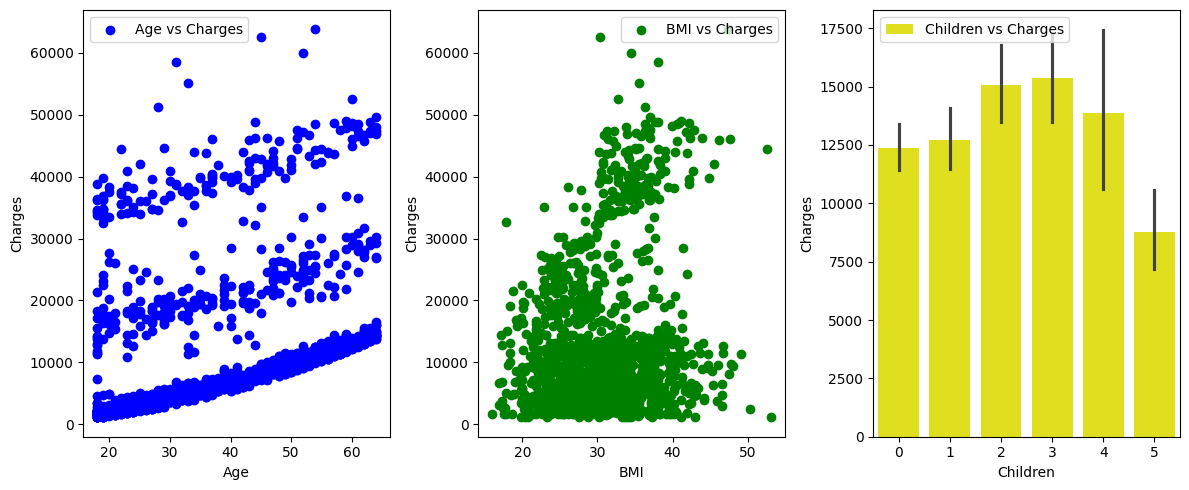

In [8]:
# 1. Age vs Charges
plt.figure(figsize=(12,5))
plt.subplot(1 , 3 , 1)
plt.scatter(x= enhanced_df['age'] ,y= enhanced_df['charges'] , c = 'blue' , label = 'Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
# 2 . BMI vs Charges
plt.subplot(1 , 3 , 2)
plt.scatter(x= enhanced_df['bmi'] ,y= enhanced_df['charges'] , c = 'green' , label = 'BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
# 3. Children vs Charges
plt.subplot(1 , 3 , 3)
sns.barplot(x= enhanced_df['children'] ,y= enhanced_df['charges'] , color = 'yellow' , label = 'Children vs Charges')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.legend()
plt.tight_layout()



### **4. Smoker vs Charges**
- **Columns**: `smoker_yes` and `charges`
- **What to Do**: Create a box plot.
- **Why We’re Doing This**:
  To examine the effect of smoking on insurance charges. Since smoking is a binary variable, a box plot will clearly show the distribution of charges for smokers (`smoker_yes = 1`) versus non-smokers (`smoker_yes = 0`).
- **Why It’s Helpful**:
  Helps assess the significant impact smoking might have on charges, a likely strong predictor in the regression model.

---

### **5. Region vs Charges**
- **Columns**: `region_northwest`, `region_southeast`, `region_southwest`, and `charges`
- **What to Do**: Cplot or box plot.
- **Why We’re Doing This**:
  To evaluate how the region influences charges. One-hot encoding splits the regions into multiple binary columns, so visualizing the data grouped by region is essential.
- **Why It’s Helpful**:
  Identifies if certain regions consistently report higher or lower charges, which can be incorporated as categorical influences in the regression.

---

### **6. BMI vs Smoker (with Charges as Color/Size)**
- **Columns**: `bmi`, `smoker_yes`, and `charges`
- **What to Do**: Create a scatter plot with `bmi` on the x-axis, `smoker_yes` as a categorical division (0 or 1), and `charges` represented by color or size.
- **Why We’re Doing This**:
  To understand the combined effect of BMI and smoking on charges.
- **Why It’s Helpful**:
  Provides a multi-variable perspective, helping identify interactions between features (e.g., whether high BMI amplifies the hon code for these visualizations?

C:\Users\user\AppData\Local\Temp\ipykernel_10708\507602220.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= enhanced_df['smoker_yes'] ,y= enhanced_df['charges'] , palette = 'flare')
C:\Users\user\AppData\Local\Temp\ipykernel_10708\507602220.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['region'] ,y= df['charges'] , palette = 'mako')


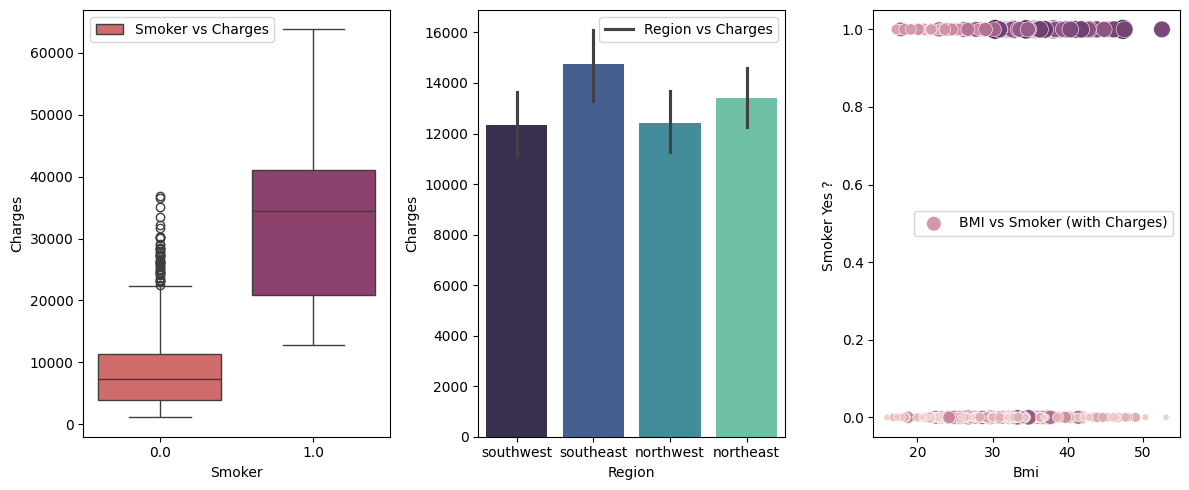

In [9]:
# 4. Smoker vs Charges # 0 means not Smoker 1 means Smoker
plt.figure(figsize=(12,5))
plt.subplot(1 , 3 , 1)
sns.boxplot(x= enhanced_df['smoker_yes'] ,y= enhanced_df['charges'] , palette = 'flare')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.legend(['Smoker vs Charges'])

# 5 . Region vs Charges
plt.subplot(1 , 3 , 2)
sns.barplot(x=df['region'] ,y= df['charges'] , palette = 'mako')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.legend(['Region vs Charges'])

# 6 . BMI vs Smoker (with Charges as Color/Size)
plt.subplot(1 , 3 , 3)
sns.scatterplot(x=enhanced_df['bmi'] ,y= enhanced_df['smoker_yes'] , hue = enhanced_df['charges'] ,  size=enhanced_df['charges'] , sizes=(20, 200))
plt.xlabel('Bmi')
plt.ylabel('Smoker Yes ? ')
plt.legend(['BMI vs Smoker (with Charges)'])
plt.tight_layout()



### **7. Age vs BMI vs Charges (3D Plot)**
- **Columns**: `age`, `bmi`, and `charges`
- **What to Do**: Create a 3D scatter plot.
- **Why We’re Doing This**:
  To explore how age and BMI together affect insurance charges in a three-dimensional space.
- **Why It’s Helpful**:
  This visualization is useful in identifying any interactions between age and BMI, especially for polynomial regression, where interaction terms can improve the model.

---

### **8. Correlation Heatmap**
- **Columns**: All numerical features (`age`, `bmi`, `children`, `charges`, `sex_male`, `smoker_yes`, `region_northwest`, `region_southeast`, `region_southwest`)
- **What to Do**: Create a heatmap of the correlation matrix.
- **Why We’re Doing This**:
  To visually inspect the correlation between all numeric features.
- **Why It’s Helpful**:
  Helps identify strong correlations, guiding which features may be redundant or highly predictive for the model. This is particularly useful for selecting variables in polynomial regression.

---

### **9. Age Distribution by Smoker Status**
- **Columns**: `age` and `smoker_yes`
- **What to Do**: Create a box plot or violin plot with `age` on the x-axis and `smoker_yes` on the y-axis.
- **Why We’re Doing This**:
  To explore the age distribution for smokers and non-smokers.
- **Why It’s Helpful**:
  This can help detect if smokers tend to be of a particular age group and whether age and smoking have a joint influence on insurance charges.

---

### **10. Charges Distribution**
- **Columns**: `charges`
- **What to Do**: Create a histogram or density plot.
- **Why We’re Doing This**:
  To understand the distribution of insurance charges.
- **Why It’s Helpful**:
  Helps in detecting outliers or skewness in charges, which may affect the choice of model or require transfoPython code for any of these visualizations?

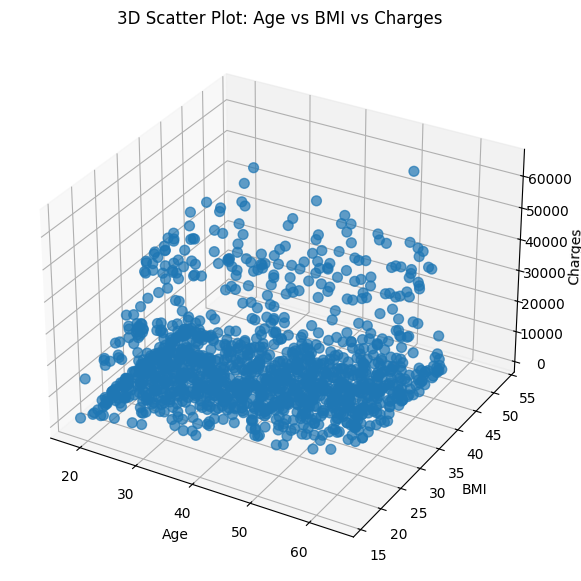

<Figure size 640x480 with 0 Axes>

In [10]:
# 7. Age vs BMI vs Charges (3D Plot)
from mpl_toolkits.mplot3d import Axes3D
x = enhanced_df['age']
y = enhanced_df['bmi']
z = enhanced_df['charges']
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111 , projection = '3d')
ax.scatter(x , y , z , s=50, alpha=0.7)
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')
ax.set_title('3D Scatter Plot: Age vs BMI vs Charges')
plt.show()
plt.tight_layout()

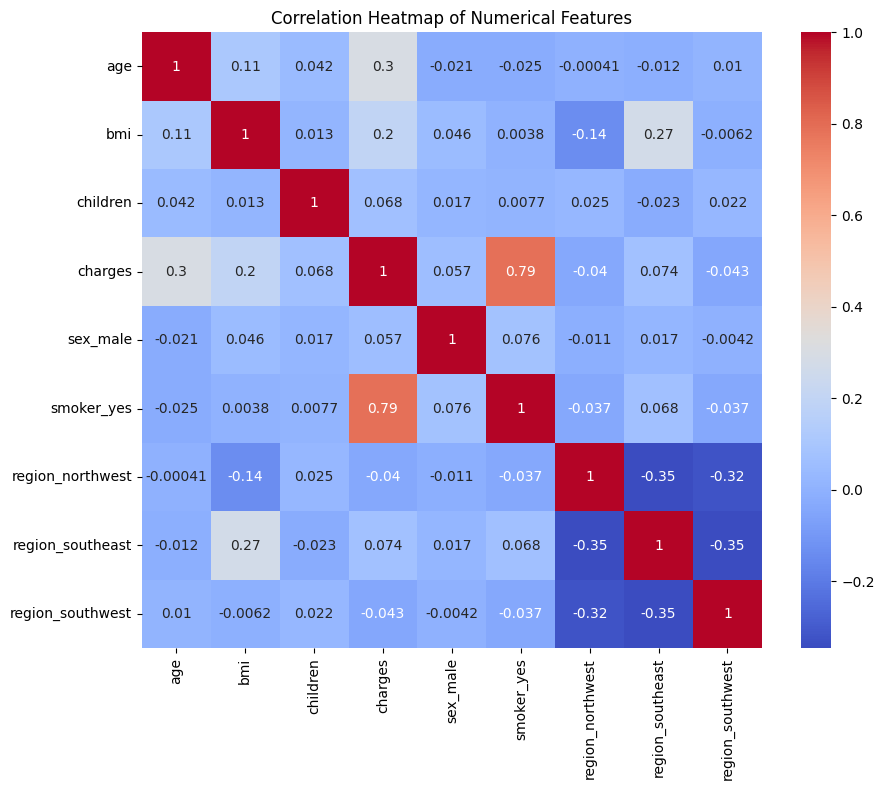

In [11]:
# 8. Correlation Heatmap
correlation_matrix = enhanced_df.corr()
plt.figure(figsize=(10 , 8))
sns.heatmap(correlation_matrix , annot = True , cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

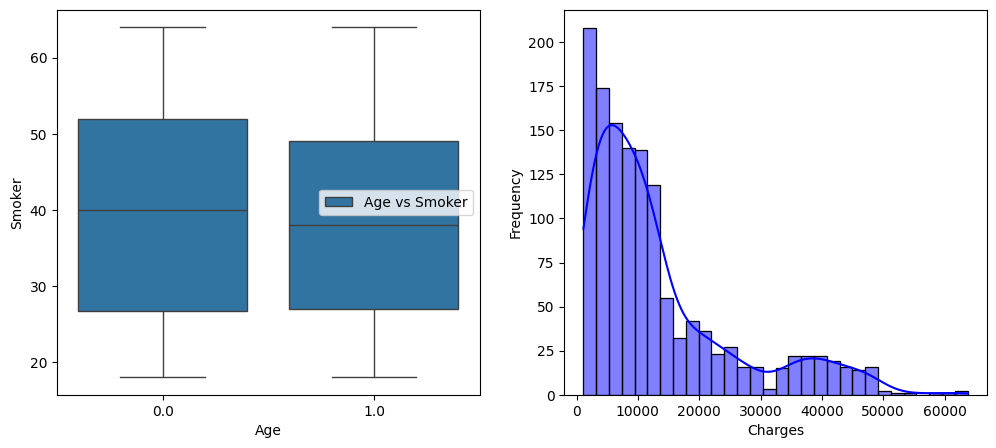

In [12]:
# 9. Age Distribution by Smoker Status
plt.figure(figsize=(12,5))
plt.subplot(1 , 2 , 1)
sns.boxplot(y= enhanced_df['age'] ,x= enhanced_df['smoker_yes'])
plt.xlabel('Age')
plt.ylabel('Smoker')
plt.legend(['Age vs Smoker'] , loc=5)

#10. Charges Distribution

plt.subplot(1 , 2 , 2)
sns.histplot(enhanced_df['charges'], kde=True, color='blue', bins=30)
# Step 4: Title and display the plot
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()